## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?

Regression predicts a continuous number and classification predicts from a set of categories.

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion table is a grid that shows what the model predicted vs what the actual category was for the classification. It helps us understand when the model has true and false positives and negatives.

3. What does the SSE quantify about a particular model?

How we'll the model is predicting outcomes. A lower SSE means the model is doing well and a higher SSE means the model is off.

4. What are overfitting and underfitting?

Overfitting happens when the model becomes too dependent on the training data, so it is not generally appicable to inputs outside the training set. Underfitting happens when the model is too general. An extreme case of underfitting would be to just predict the same value every time. 

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

Splitting into training and testing sets helps prevent overfitting of the data since the model is not being trained on the same data that is being used to evaluate it. Choosing a $k$ to minimize the SSE aims to find a balance between overfitting with a low $k$ and underfitting with a high $k$. Minimzing SSE over $k$ will produce the best predictions for the training set and hopefully for the testing set too.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

A class prediction is simple and requires much less calculation, however, the probability distribution can be more desirable since it gives the user of the model much more information about possible prediction values. For instance, if 51% of the points around an input are classified as $A$, and 49% as $B$, then the user of a simple prediction model would simply see $A$, and not know that the input is almost as likely to be of type $B$. 

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)
   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
k=3, Mean Squared Error: 133487993.49644443


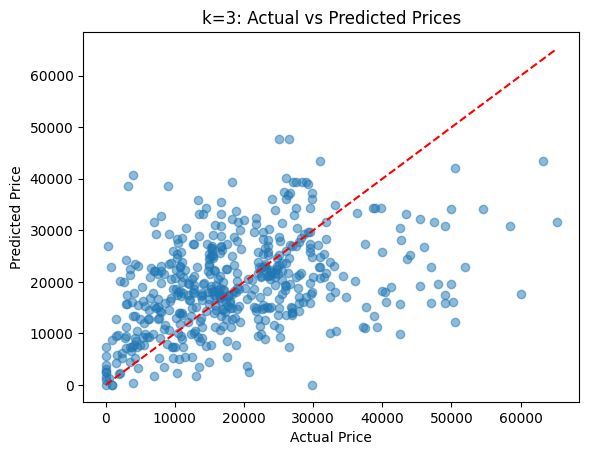

k=10, Mean Squared Error: 111643143.61873999


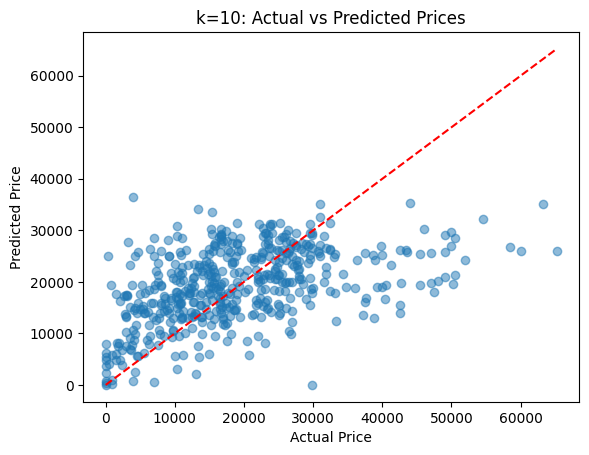

k=25, Mean Squared Error: 104946230.110448


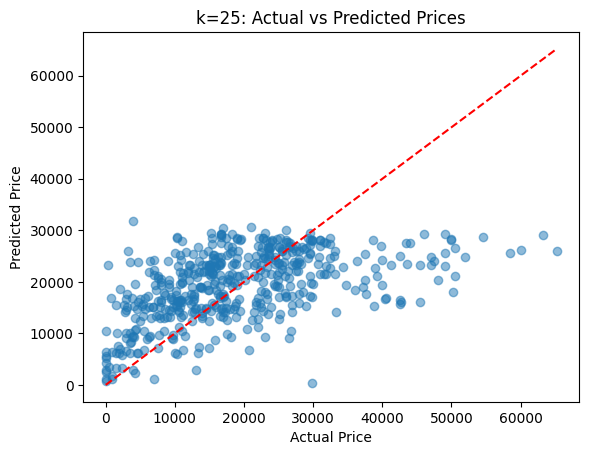

k=50, Mean Squared Error: 103867056.3565168


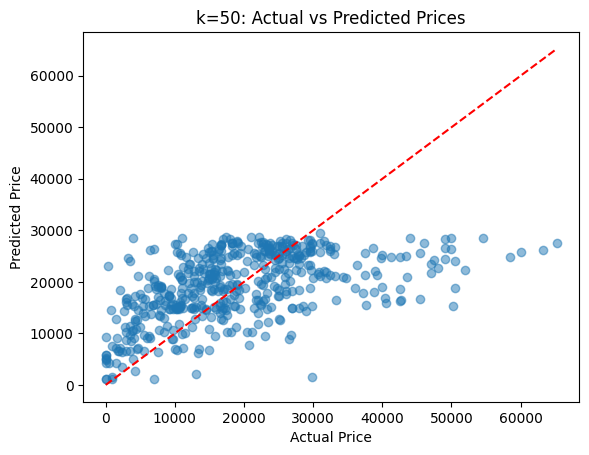

k=100, Mean Squared Error: 104534620.68129261


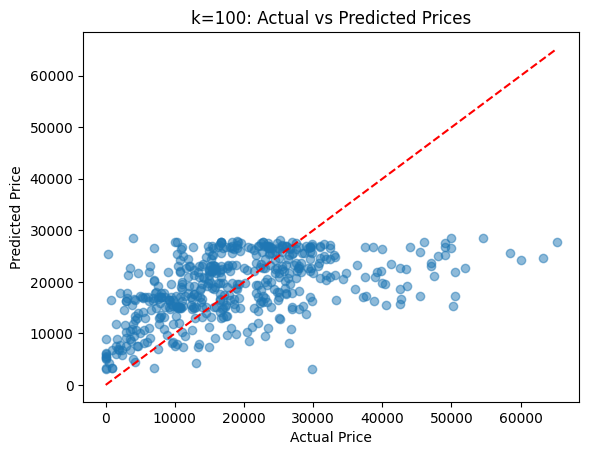

k=300, Mean Squared Error: 107656474.53848925


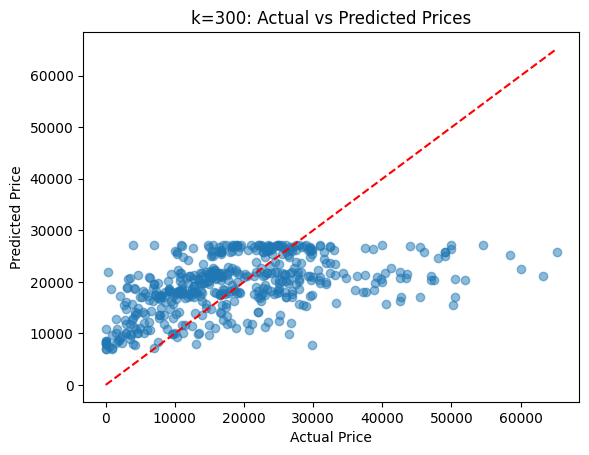

The optimal k is 50 with a Mean Squared Error of 103867056.3565168


In [6]:
# The target variable `y` is `price` and the features are `year` and `mileage`.

# 1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

import pandas as pd
data = pd.read_csv('../data/USA_cars_datasets.csv')
data = data[['price', 'year', 'mileage']].dropna()
print(data.head())
print(data.shape)


# 2. Maxmin normalize `year` and `mileage`.

import numpy as np

def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

data['year'] = maxmin(data['year'])
data['mileage'] = maxmin(data['mileage'])
print(data.head())


# 3. Split the sample into ~80% for training and ~20% for evaluation.

# %pip install scikit-learn
from sklearn.model_selection import train_test_split
X = data[['year', 'mileage']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)


# 4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
k_values = [3, 10, 25, 50, 100, 300]
SSE = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    mse = np.mean((y_test - y_pred) ** 2)
    SSE.append(mse)
    
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'k={k}: Actual vs Predicted Prices')
    plt.show()

# As the values of k increase, the model has a smaller and smaller range of values that it predicts. There is also clear line of predictions where most of the points cluster together around 30000.

# 5. Determine the optimal $k$ for these data.
optimal_k = k_values[np.argmin(SSE)]
print(f'The optimal k is {optimal_k} with an SSE {min(SSE)}')

# 6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

# As k increases, the model tends to underfit the data because it averages over more neighbors. This change leads to lower ranges of values in predictions (ie lower variance and standard deviation). For smaller k values, the model may overfit the training data, creating noisy and leading to more scattered predictions. The optimal k value of 50 balances these two and provides a good trade-off between bias and variance.



**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [ ]:
# The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

# 1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv('../data/zoo.csv')
# for i in range(1, 8):
#     print(f'class {i}:')
#     print(data[data['class'] == i]['animal'].head(5).values)    
# print(data['class'].value_counts())
# print(data.describe())

# classes 1 and 2 have the most observations, while class 3 has the least.  I'm guessing that 1 is mammals, 2 is birds, 3 is reptiles, 4 is fish, 5 is amphibian, 6 is insects and 7 is mollosks. Most feautures have standard devitiations between 0.4 and 0.5, except for backbone, venemous and fins which have smaller standard deviations. The features that I think would best predict the class are hair, feathers, fins, and eggs because they are more likely to be mutually exclusive across classes. For instance mammals are likely to have hair, birds will be the only class with feathers, and reptiles are likely to have eggs but not fins and fish will have fins and eggs.

# 2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)

def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

from sklearn.model_selection import train_test_split


X = maxmin(data.drop(columns=['class', 'animal']))
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=65)

# 3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
k_bar = 50
Acc = []
N_train = len(y_train)
N_test = len(y_test)

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) 
    fitted_model = model.fit(X_train.values,y_train) 
    y_hat = fitted_model.predict(X_test.values) 
    Acc.append( np.sum( y_hat == y_test )/N_test )

Acc_max = np.max(Acc)
max_index = np.where(Acc==Acc_max)
k_star = max_index[0]+1 
print(k_star, Acc_max)

best_model = KNeighborsClassifier(n_neighbors=k_star[0])
best_fitted_model = best_model.fit(X_train.values,y_train)

# 4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?

from sklearn.metrics import confusion_matrix

y_pred = best_fitted_model.predict(X_test.values)
labels = np.unique(y_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
display(conf_df)

# The model has an accuracy of 86.2% so not too bad. It seems like most of the mistakes were made on classes that have very small amounts of data. Although class 5 seems to be predicted well even though it only has 2 observations in the test set.

# 5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

X_reduced = maxmin(data[['milk', 'aquatic', 'airborne']])
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_reduced, y, test_size=0.5, random_state=65)

# use the same method as before to find the optimal k for the reduced model
k_bar_2 = 50
Acc_2 = []
N_train_2 = len(y_train_2)
N_test_2 = len(y_test_2)

for k in range(k_bar_2):
    model_2 = KNeighborsClassifier(n_neighbors=k+1) 
    fitted_model_2 = model_2.fit(X_train_2.values,y_train_2) 
    y_hat_2 = fitted_model_2.predict(X_test_2.values) 
    Acc_2.append( np.sum( y_hat_2 == y_test_2 )/N_test_2 )

Acc_max_2 = np.max(Acc_2)
max_index_2 = np.where(Acc_2==Acc_max_2)
k_star_2 = max_index_2[0]+1
print(k_star_2, Acc_max_2)

reduced_best_model = KNeighborsClassifier(n_neighbors=k_star_2[0])
reduced_fitted_model = reduced_best_model.fit(X_train_2.values,y_train_2)

y_pred_2 = reduced_fitted_model.predict(X_test_2.values)
conf_matrix_2 = confusion_matrix(y_test_2, y_pred_2, labels=labels)
conf_df_2 = pd.DataFrame(conf_matrix_2, index=labels, columns=labels)
display(conf_df_2)

# show predicted probabilities
y_pred_proba = reduced_fitted_model.predict_proba(X_test_2.values)
proba_df = pd.DataFrame(y_pred_proba, columns=[f'Class_{label}' for label in labels])
display(proba_df)

# This since the best k value for this model is only 2 the only possible probabilities are 0, 0.5 and 1. This means that some of the classes are not represented in predictions since the probabilities must add up to 1. The model also has a lower accuracy of 70.5%, which makes sense to me since we're using fewer features.


[1] 0.8627450980392157


,1,2,3,4,5,6,7
1,19,0,0,0,0,0,0
2,0,8,0,0,0,0,0
3,1,0,1,1,1,0,0
4,0,0,0,8,0,0,0
5,0,0,0,0,2,0,0
6,0,0,0,0,0,4,0
7,0,0,2,2,0,0,2


[2] 0.7058823529411765


,1,2,3,4,5,6,7
1,19,0,0,0,0,0,0
2,0,6,1,1,0,0,0
3,0,0,3,1,0,0,0
4,0,0,0,8,0,0,0
5,0,0,0,2,0,0,0
6,0,3,1,0,0,0,0
7,0,0,4,2,0,0,0


,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.5,0.0,0.0,0.5,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

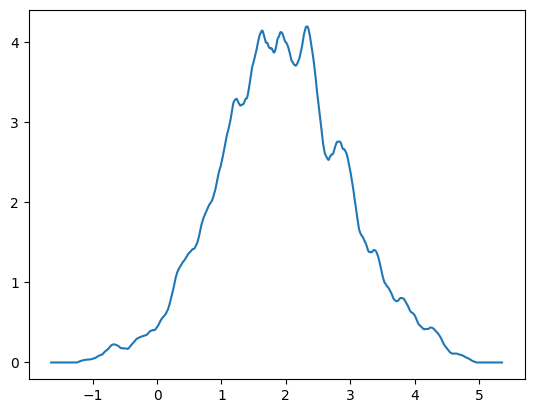

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def gaussian_kernel(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

def uniform_kernel(x):
    return 0.5*(np.abs(x) <= 1)

def epanechnikov_kernel(x):
    return 0.75*(1-x**2)*(np.abs(x) <= 1)

# deciding that the kernel function can be passed in as an argument
def kdeplot(data, bandwidth=None, k_function=None):
    # set up basic variables
    n = len(X)
    sd = np.std(data)
    if bandwidth == None:
        bandwidth = 1.06*sd*n**(-1/5)
    if k_function == None:
        k_function = gaussian_kernel
    nh_inv = 1/(n*bandwidth)

    # get values to evaluate the kernel on
    x_min, x_max = data.min() - 3*bandwidth, data.max() + 3*bandwidth
    x_grid = np.linspace(x_min, x_max, 1000)

    # use cdist with column vectors
    # cdists = cdist(x_grid[:, None], data[:, None])
    # u = cdists / bandwidth

    # # fix signs, since cdist only gives absolute distances
    # u *= np.sign(x_grid[:, None] - data[:, None])

    # I think that numpy broadcasting would be better to avoid this complexity
    u = (x_grid[:, None] - data[None, :]) / bandwidth

    # apply kernel function
    k_values = k_function(u)
    density = nh_inv * np.sum(k_values, axis=1)

    plt.plot(x_grid, density)
    plt.show()


# create sample data
np.random.seed(0)
sample_data = np.random.normal(loc=2, scale=1, size=1000)
# plot KDE
kdeplot(sample_data, bandwidth=4, k_function=epanechnikov_kernel)




